In [6]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import time
import os

In [7]:
from stable_baselines.common.vec_env import DummyVecEnv, VecNormalize
from stable_baselines.common.policies import MlpPolicy
from stable_baselines import PPO2, A2C, ACKTR
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines import results_plotter

In [8]:
log_dir = "logs_nn"
os.makedirs(log_dir, exist_ok=True)

In [9]:
env = gym.make('CartPole-v1')
env = Monitor(env, log_dir) # required for using callback functions during training

In [10]:
from stable_baselines.common.callbacks import BaseCallback
class SaveOnBestTrainingRewardCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).

    :param check_freq: (int)
    :param avg_episodes: (int) average over the past n episodes (default: 100)
    :param log_dir: (str) Path to the folder where the model will be saved.
      It must contains the file created by the ``Monitor`` wrapper.
    :param verbose: (int)
    :param vec_norm_env: (VecNormalize) stable-baselines VecNormalize object (contains Gym env)
    """
    def __init__(self, check_freq: int, log_dir: str, verbose=1, avg_episodes=100, vec_norm_env=None):
        super(SaveOnBestTrainingRewardCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, 'best_model_nn')
        self.best_mean_reward = -np.inf
        self.best_timestep = -np.inf
        self.vec_norm_env = vec_norm_env
        self.avg_episodes = avg_episodes

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:

            # Retrieve training reward
            x, y = ts2xy(load_results(self.log_dir), 'timesteps')
            
            if len(x) > 0:
                # Mean training reward over the last avg_episodes episodes
                mean_reward = np.mean(y[-self.avg_episodes:])

                # New best model, you could save the agent here
                if mean_reward > self.best_mean_reward:
                    self.best_mean_reward = mean_reward
                    self.best_timestep = self.num_timesteps
                    # Example for saving best model
                    if self.verbose > 0:
                        print("Saving new best model to {}".format(self.save_path))
                    self.model.save(self.save_path)

                if self.verbose > 0:
                    print("Num timesteps: {}".format(self.num_timesteps))
                    print("Best mean reward: {:.2f} (ts={}) - Last mean reward per episode: {:.2f}".format(self.best_mean_reward, self.best_timestep, mean_reward))


        return True

In [11]:
time_steps=11000

tensorboard_dir = "cartpole_tb_nn"
os.makedirs(tensorboard_dir, exist_ok=True)

model = PPO2(MlpPolicy, env, verbose=0)


callback=SaveOnBestTrainingRewardCallback(check_freq=5000, log_dir=log_dir, avg_episodes=30, vec_norm_env=env)
model.learn(total_timesteps=time_steps, callback=callback)

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Saving new best model to logs_nn\best_model_nn
Num timesteps: 5000
Best mean reward: 81.17 (ts=5000) - Last mean reward per episode: 81.17
Saving new best model to logs_nn\best_model_nn
Num timesteps: 10000
Best mean reward: 125.43 (ts=10000) - Last mean reward per episode: 125.43


In [13]:
model = PPO2(MlpPolicy, env, verbose=0)
model.learn(total_timesteps=25000)
model.save("ppo2_cartpole")

del model # remove to demonstrate saving and loading

model = PPO2.load("ppo2_cartpole")

# Enjoy trained agent
obs = env.reset()
i = 1

life_times = []

for _ in range(10):
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    print(str(i) + " " + str(done))
    if(done):
        life_times.append(i)
        i = 1
    else:
        i = i+ 1
#    env.render()

print(life_times)

1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
[]


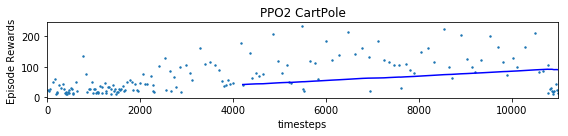

TypeError: plot_curves() missing 2 required positional arguments: 'xaxis' and 'title'

In [16]:
results_plotter.plot_results([log_dir], time_steps, results_plotter.X_TIMESTEPS, "PPO2 CartPole")
plt.savefig("results1-cartpole.png")
plt.show()

In [19]:
tslist = []
    for folder in [log_dir]:
        timesteps = load_results(folder)
        if num_timesteps is not None:
            timesteps = timesteps[timesteps.l.cumsum() <= num_timesteps]
        tslist.append(timesteps)
    xy_list = [ts2xy(timesteps_item, xaxis) for timesteps_item in tslist]
    plot_curves(xy_list, xaxis, task_name)

logs_nn


model = PPO2.load("%s/best_model_nn.zip" % log_dir)

env = DummyVecEnv([lambda: gym.make("CartPole-v1")])
# Load the saved statistics
env.training=False

state = env.reset()
done=False
cumReward = 0
steps=0

while not done: 
    steps += 1
    action, _states = model.predict(state)
    state, reward, done, _ = env.step(action)
    cumReward += reward
    env.render() ## <- comment out in Google colab

env.close()
    
print ("steps=%d, cumReward=%.3f" % (steps, cumReward))